In [20]:
import pandas as pd
from pypecast.models import MLP, Simple_LSTM
from pypecast.features import BuildFeaturesSupervised
from pypecast.descriptor import SeriesDescriptor
from pypecast.metrics.metrics import *

In [21]:
df = pd.read_csv('../data/processed/merged_90_days.csv').drop(['Unnamed: 0', 'Var'], axis=1)
#test_df = pd.read_csv('../data/processed/test/merged_4_days.csv').drop(['Unnamed: 0', 'Var'], axis=1)
df = df[df.Simb == 'PETR4'].Med
dummy = pd.read_csv('../data/example/dummy.csv')
dummy = dummy.Sales.loc[:35].apply(lambda x: float(x))

In [15]:
series = dummy

### Descriptor

In [16]:
sd = SeriesDescriptor()

-> Description of the series data:
            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000
-------------------- Histogram --------------------
-> Autocorrelation and partial autocorrelation:
-> Checking for trends:
-> Checking for outliers:
-> Checking for long-run cycles:
-> Checking if series variance is constant:
-> Checking for abrupt changes:


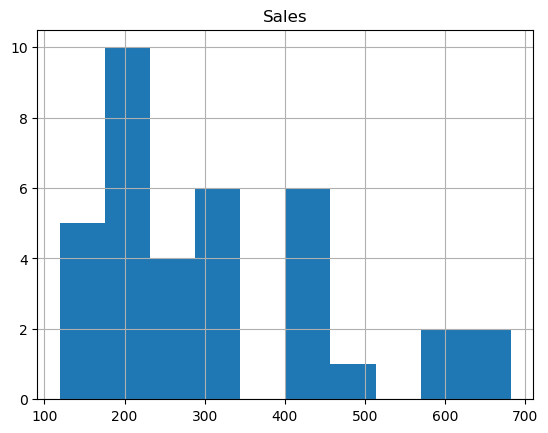

<Figure size 1200x600 with 0 Axes>

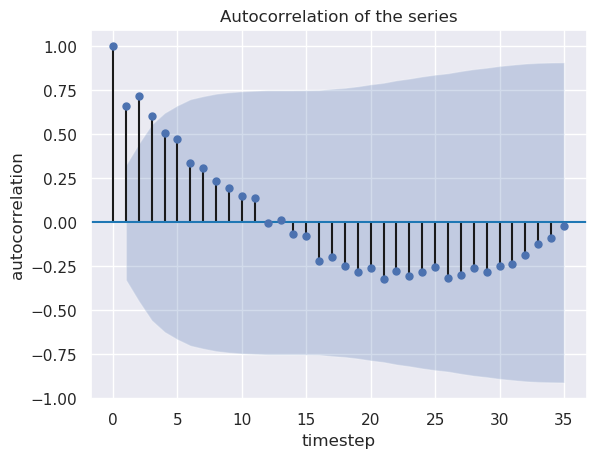

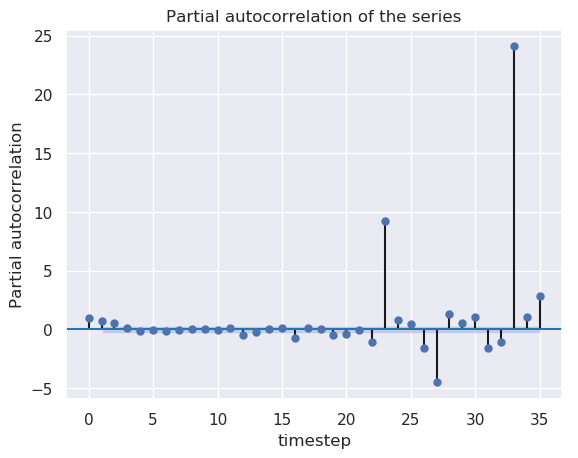

In [17]:
sd.full_report(data=series)

In [18]:
n_lag = 5
n_seq = 3

bf = BuildFeaturesSupervised(n_lag, n_seq,difference=True,scaler_type='norm')

In [19]:
scaler, train, test = bf.transform_data(series)

In [8]:
model = Simple_LSTM(n_lag, n_seq, 5)

In [26]:
model.fit(train, n_batch = 1, n_epoch=100, early_stopping=True)

Train on 16 samples, validate on 5 samples
Epoch 1/100
 - 1s - loss: 0.1658 - val_loss: 0.1663
Epoch 2/100
 - 0s - loss: 0.1634 - val_loss: 0.1627
Epoch 3/100
 - 0s - loss: 0.1614 - val_loss: 0.1594
Epoch 4/100
 - 0s - loss: 0.1595 - val_loss: 0.1562
Epoch 5/100
 - 0s - loss: 0.1578 - val_loss: 0.1532
Epoch 6/100
 - 0s - loss: 0.1563 - val_loss: 0.1504
Epoch 7/100
 - 0s - loss: 0.1548 - val_loss: 0.1477
Epoch 8/100
 - 0s - loss: 0.1535 - val_loss: 0.1451
Epoch 9/100
 - 0s - loss: 0.1522 - val_loss: 0.1426
Epoch 10/100
 - 0s - loss: 0.1510 - val_loss: 0.1402
Epoch 11/100
 - 0s - loss: 0.1499 - val_loss: 0.1379
Epoch 12/100
 - 0s - loss: 0.1488 - val_loss: 0.1357
Epoch 13/100
 - 0s - loss: 0.1478 - val_loss: 0.1336
Epoch 14/100
 - 0s - loss: 0.1469 - val_loss: 0.1315
Epoch 15/100
 - 0s - loss: 0.1459 - val_loss: 0.1295
Epoch 16/100
 - 0s - loss: 0.1451 - val_loss: 0.1275
Epoch 17/100
 - 0s - loss: 0.1442 - val_loss: 0.1256
Epoch 18/100
 - 0s - loss: 0.1434 - val_loss: 0.1238
Epoch 19/100

In [27]:
forecasts = model.forecast_series(test=test, scaler=scaler, orig_series=series)

In [28]:
model.evaluate_forecast()

--------------------Forecast evaluation--------------------

Instant t+1
t+1 RMSE: 100.399875
t+1 MAE: 82.608373
t+1 MAPE: 0.158862
t+1 sMAPE: 0.166707

Instant t+2
t+2 RMSE: 77.400947
t+2 MAE: 60.896217
t+2 MAPE: 0.112297
t+2 sMAPE: 0.120064

Instant t+3
t+3 RMSE: 131.209377
t+3 MAE: 112.517030
t+3 MAPE: 0.200450
t+3 sMAPE: 0.219796



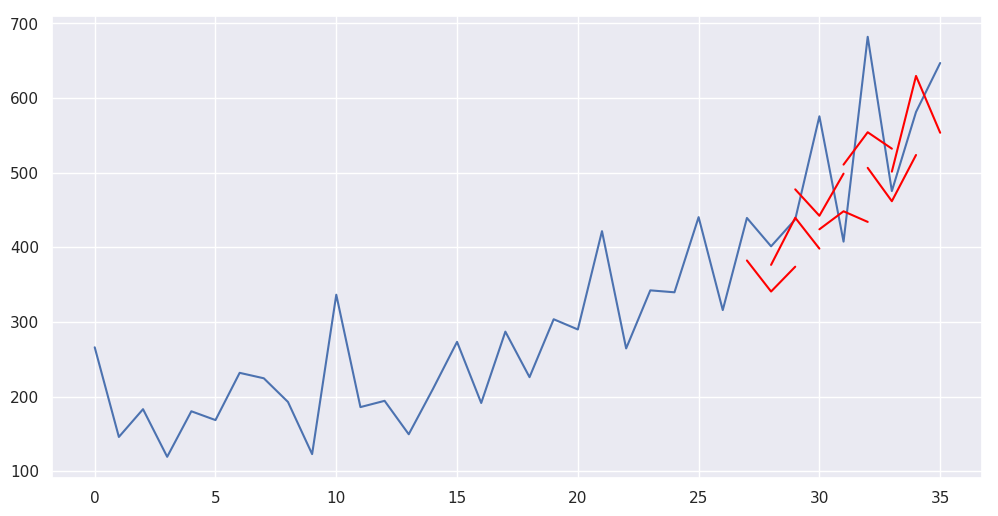

In [29]:
model.plot_forecasts(forecasts=forecasts,series=series, test=test)